In [7]:
from nlp_gym.data_pools.custom_question_answering_pools import QASC, AIRC
from nlp_gym.envs.question_answering.env import QAEnv
from nlp_gym.envs.question_answering.featurizer import InformedFeaturizer, SimpleFeaturizer
from stable_baselines.deepq.policies import MlpPolicy as DQNPolicy
from stable_baselines import DQN
from stable_baselines.common.env_checker import check_env
import tqdm

In [8]:
import numpy as np

In [13]:
data_pool = AIRC.prepare(split="train", dataset_id="ARC-Easy-IR")
val_pool = AIRC.prepare(split="val", dataset_id="ARC-Easy-IR")

In [14]:
featurizer = InformedFeaturizer()

In [15]:
# seq tag env
env = QAEnv(observation_featurizer=featurizer)
for sample, weight in data_pool:
    env.add_sample(sample, weight)

# check the environment
check_env(env, warn=True)

In [19]:
def eval_model(env, model, pool, random = False):
    correctly_answered = 0.0
    for sample, _ in tqdm.tqdm(pool, desc="Evaluating"):
        obs = env.reset(sample)
        state = None
        done = False
        while not done:
            if random:
                action, state = np.random.randint(2), None#model.predict(obs)
            else:
                action, state = model.predict(obs)
            action = int(action)
            obs, reward, done, info = env.step(action)

        if info["selected_choice"] == sample.answer:
            correctly_answered += 1

    return correctly_answered/len(pool)

In [20]:
from stable_baselines import A2C, SAC, ACER, HER, ACKTR, PPO2
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.deepq.policies import LnMlpPolicy, CnnPolicy, LnCnnPolicy


In [22]:
# model = PPO2(env=env, policy=MlpPolicy, gamma=0.99, learning_rate=1e-4,
#             policy_kwargs={"layers": [64, 64]},
#             verbose=0)
model_1 = DQN(env=env, policy=DQNPolicy, gamma=0.99, batch_size=32, learning_rate=1e-4,
            double_q=False, exploration_fraction=0.1,
            prioritized_replay=False, policy_kwargs={"layers": [64, 64]},
            verbose=0)
# model_2 = DQN(env=env, policy=DQNPolicy, gamma=0.99, batch_size=32, learning_rate=1e-5,
#             double_q=True, exploration_fraction=0.1,
#             prioritized_replay=False, policy_kwargs={"layers": [64, 64]},
#             verbose=0)
# model_3 = DQN(env=env, policy=LnMlpPolicy, gamma=0.99, batch_size=32, learning_rate=1e-5,
#             double_q=False, exploration_fraction=0.1,
#             prioritized_replay=False, policy_kwargs={"layers": [64, 64]},
#             verbose=0)
# model = DQN(env=env, policy=LnMlpPolicy, gamma=0.99, batch_size=32, learning_rate=1e-4,
#             double_q=True, exploration_fraction=0.1,
#             prioritized_replay=False, policy_kwargs={"layers": [64, 64]},
#             verbose=0)
# model = ACER(env=env, policy=MlpPolicy, gamma=0.99, learning_rate=1e-3,
#             policy_kwargs={"layers": [64, 64]},
#             verbose=0)
iteration = 50
new_outputs = []
for model in [model_1]:
    evals = []
    for i in range(iteration):
        model.learn(total_timesteps=int(1e+3), reset_num_timesteps=False)
        evals.append(eval_model(env, model, val_pool))
        print(i, evals[-1])
    new_outputs.append(evals)

Evaluating: 100%|██████████| 570/570 [00:59<00:00,  9.66it/s]


0 0.20701754385964913


Evaluating: 100%|██████████| 570/570 [00:23<00:00, 24.31it/s]


1 0.2771929824561403


Evaluating: 100%|██████████| 570/570 [00:53<00:00, 10.61it/s]


2 0.24035087719298245


Evaluating: 100%|██████████| 570/570 [00:37<00:00, 15.32it/s]


3 0.26666666666666666


Evaluating: 100%|██████████| 570/570 [00:31<00:00, 18.11it/s]


4 0.2596491228070175


Evaluating: 100%|██████████| 570/570 [00:30<00:00, 18.61it/s]


5 0.24736842105263157


Evaluating: 100%|██████████| 570/570 [00:32<00:00, 17.59it/s]


6 0.2631578947368421


Evaluating: 100%|██████████| 570/570 [00:52<00:00, 10.78it/s]


7 0.24561403508771928


Evaluating: 100%|██████████| 570/570 [00:56<00:00, 10.10it/s]


8 0.20701754385964913


Evaluating: 100%|██████████| 570/570 [00:42<00:00, 13.52it/s]


9 0.24736842105263157


Evaluating: 100%|██████████| 570/570 [00:26<00:00, 21.61it/s]


10 0.28596491228070176


Evaluating: 100%|██████████| 570/570 [00:52<00:00, 10.87it/s]


11 0.22456140350877193


KeyboardInterrupt: 

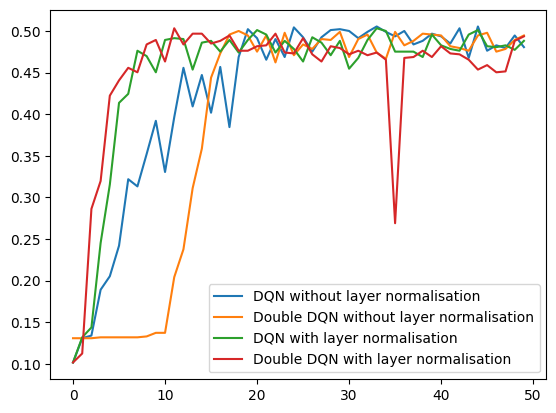

In [98]:
from matplotlib import pyplot as plt
plt.plot(outputs[0], label = "DQN without layer normalisation")
plt.plot(new_outputs[0], label = "Double DQN without layer normalisation")
plt.plot(new_outputs[1], label = "DQN with layer normalisation")
plt.plot(outputs[3], label = "Double DQN with layer normalisation")

plt.legend()
plt.show()

In [23]:
outputs

NameError: name 'outputs' is not defined

In [40]:
i = 0
for sample, _ in tqdm.tqdm(val_pool, desc="Evaluating"):
    obs = env.reset(sample)
    print(sample)
    state = None
    done = False
    count = 0
    while not done:
        action, state = 1, None
        obs, reward, done, info = env.step(action)
        print(obs)
        count += 1
    print(count)
    i += 1
    if i >= 10:
        breal


Evaluating:   0%|          | 4/926 [00:00<00:26, 34.64it/s]

Sample(id='3NGI5ARFTT4HNGVWXAMLNBMFA0U1PG', question='Climate is generally described in terms of what?', facts=['Climate is generally described in terms of temperature and moisture.', 'Fire behavior is driven by local weather conditions such as winds, temperature and moisture.'], choices={'A': 'sand', 'B': 'occurs over a wide range', 'C': 'forests', 'D': 'Global warming', 'E': 'rapid changes occur', 'F': 'local weather conditions', 'G': 'measure of motion', 'H': 'city life'}, answer='F')
[0.7476193 0.7695932]
[0.45966423 0.52498716]
[0.5382543 0.6019071]
[0.64610815 0.67804897]
[0.6762571 0.7989105]
[0.73428714 0.7583523 ]
[0.629653  0.6754219]
[0.629653  0.6754219]
8
Sample(id='3N2BF7Y2VQTM6OJX7JXEYU8RMTXMH4', question='what varies by altitude?', facts=['Climate is generally described in terms of temperature and moisture.', 'Instructions Climate Climate varies according to altitude.'], choices={'A': 'h2o composition', 'B': 'snow, ice, and rock', 'C': 'salt and pepper', 'D': 'melanin a

Evaluating:   1%|          | 9/926 [00:00<00:24, 38.15it/s]

[0.5313446 0.5530947]
[0.5122466 0.5197382]
[0.47173157 0.46792746]
[0.5113972 0.5988957]
[0.33675873 0.36204445]
[0.4268679 0.426503 ]
[0.4268679 0.426503 ]
8
Sample(id='36TFCYNS449X00I1LQZN9BOPQNKHXZ', question='what is a simple mode of transportation?', facts=['a vehicle is used for transportation', 'Passenger vehicles are the primary mode of transportation.'], choices={'A': 'lamphreys', 'B': 'potassium', 'C': 'Being over land', 'D': 'chemical messengers', 'E': 'mammals', 'F': 'moving over land', 'G': 'With feedback loops', 'H': 'passenger cars'}, answer='H')
[0.41773802 0.4125913 ]
[0.68979704 0.69966555]
[0.61111414 0.6236521 ]
[0.49915642 0.49661943]
[0.7025779  0.71938026]
[0.56581885 0.563325  ]
[0.5884449  0.64937824]
[0.5884449  0.64937824]
8


NameError: name 'breal' is not defined